### REALIZE ANÁLISES EXPLORATÓRIAS NOS DADOS E RESPONDA AS SEGUINTES PERGUNTAS:

1.Qual(s) a(s) companhia(s) que mais registram atrasos? Analise qualitativamente e quantitativamente.


In [96]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Leitura da base de dados
BaseDados = pd.read_csv(
    "https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv",
    index_col=0
    )
BaseDados.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [33]:
#Verificando os parametros da base de dados, como tipo e se há dados nulos
BaseDados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


In [34]:
#Renomeadno colunas
new_columns = ["Ano", "Mês", "Dia", "Tempo-Partida", "Atraso-Partida", "Tempo-Chegada", "Atraso-Chegada", "Companhia", "Id-Aeronave", "Id-Voo", "Origem", "Destino", "Tempo-Voo", "Distancia", "Horas", "Minutos"]
BaseDados.columns = new_columns
BaseDados.head()

,Ano,Mês,Dia,Tempo-Partida,Atraso-Partida,Tempo-Chegada,Atraso-Chegada,Companhia,Id-Aeronave,Id-Voo,Origem,Destino,Tempo-Voo,Distancia,Horas,Minutos
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [35]:
BaseDados = BaseDados.dropna()

In [36]:
BaseDados = BaseDados.applymap(lambda x: int(x) if isinstance(x, float) else x);

C:\Users\menez\AppData\Local\Temp\ipykernel_20684\3797823171.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  BaseDados = BaseDados.applymap(lambda x: int(x) if isinstance(x, float) else x);


In [37]:
BaseDados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 1 to 336770
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Ano             327346 non-null  int64 
 1   Mês             327346 non-null  int64 
 2   Dia             327346 non-null  int64 
 3   Tempo-Partida   327346 non-null  int64 
 4   Atraso-Partida  327346 non-null  int64 
 5   Tempo-Chegada   327346 non-null  int64 
 6   Atraso-Chegada  327346 non-null  int64 
 7   Companhia       327346 non-null  object
 8   Id-Aeronave     327346 non-null  object
 9   Id-Voo          327346 non-null  int64 
 10  Origem          327346 non-null  object
 11  Destino         327346 non-null  object
 12  Tempo-Voo       327346 non-null  int64 
 13  Distancia       327346 non-null  int64 
 14  Horas           327346 non-null  int64 
 15  Minutos         327346 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 42.5+ MB


In [38]:
#Transformando minutos em horas
BaseDados['Tempo-Partida'] = BaseDados['Tempo-Partida'].apply(lambda x: x / 60)
BaseDados['Atraso-Partida'] = BaseDados['Atraso-Partida'].apply(lambda x: x / 60)
BaseDados['Tempo-Chegada'] = BaseDados['Tempo-Chegada'].apply(lambda x: x / 60)
BaseDados['Atraso-Chegada'] = BaseDados['Atraso-Chegada'].apply(lambda x: x / 60)

In [39]:
BaseDados.head()

,Ano,Mês,Dia,Tempo-Partida,Atraso-Partida,Tempo-Chegada,Atraso-Chegada,Companhia,Id-Aeronave,Id-Voo,Origem,Destino,Tempo-Voo,Distancia,Horas,Minutos
1,2013,1,1,8.616667,0.033333,13.833333,0.183333,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,8.883333,0.066667,14.166667,0.333333,UA,N24211,1714,LGA,IAH,227,1416,5,33
3,2013,1,1,9.033333,0.033333,15.383333,0.550000,AA,N619AA,1141,JFK,MIA,160,1089,5,42
4,2013,1,1,9.066667,-0.016667,16.733333,-0.300000,B6,N804JB,725,JFK,BQN,183,1576,5,44
5,2013,1,1,9.233333,-0.100000,13.533333,-0.416667,DL,N668DN,461,LGA,ATL,116,762,5,54


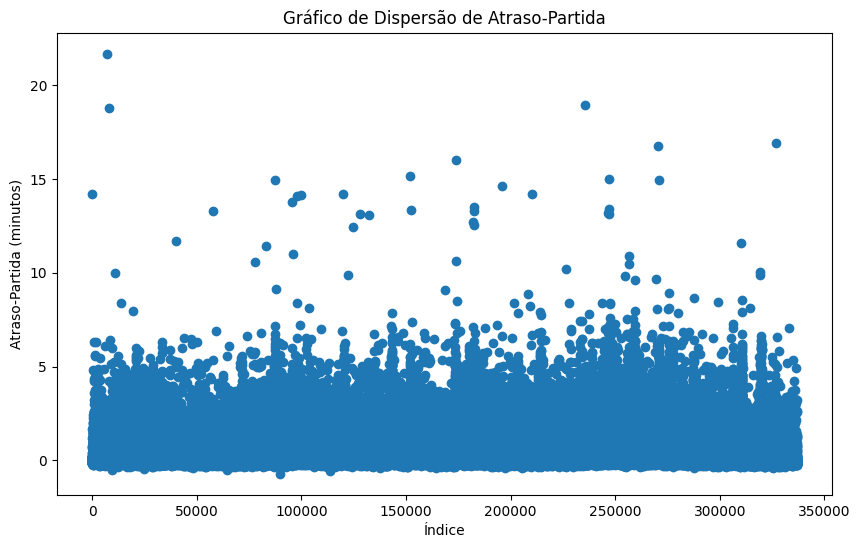

In [40]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(BaseDados.index, BaseDados['Atraso-Partida'])

# Adicionando título e rótulos
plt.title('Gráfico de Dispersão de Atraso-Partida')
plt.xlabel('Índice')
plt.ylabel('Atraso-Partida (minutos)')

# Mostrando o gráfico
plt.show()

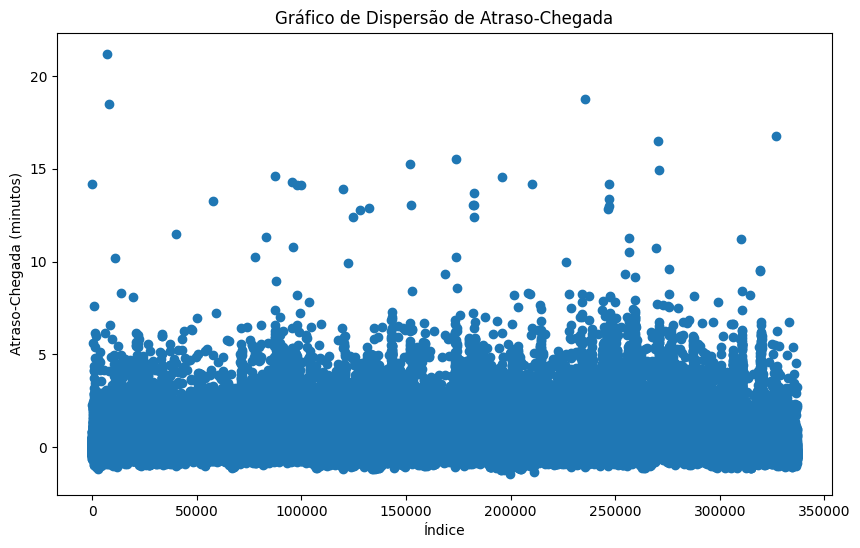

In [41]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(BaseDados.index, BaseDados['Atraso-Chegada'])

# Adicionando título e rótulos
plt.title('Gráfico de Dispersão de Atraso-Chegada')
plt.xlabel('Índice')
plt.ylabel('Atraso-Chegada (minutos)')

# Mostrando o gráfico
plt.show()

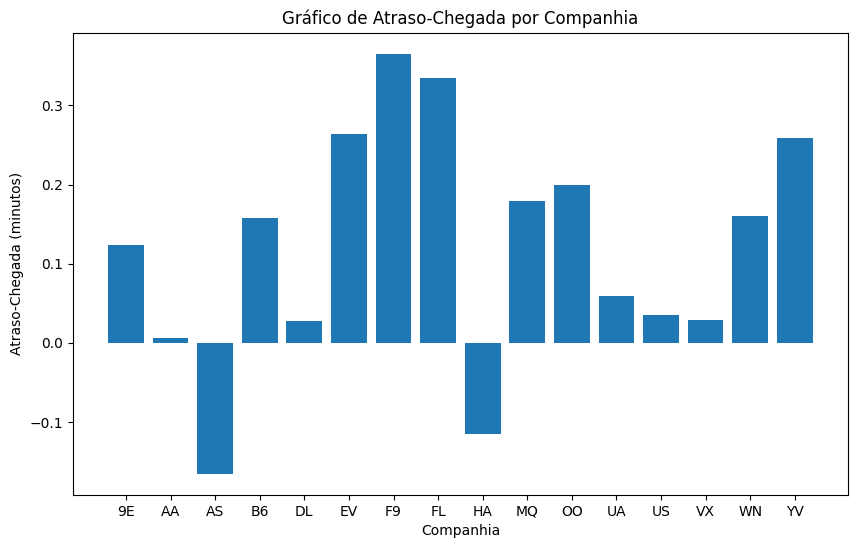

In [42]:
# Agrupando os dados por Companhia e calculando a média de Atraso-Chegada
df_grouped = BaseDados.groupby('Companhia')['Atraso-Chegada'].mean().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Companhia'], df_grouped['Atraso-Chegada'])

# Adicionando título e rótulos
plt.title('Gráfico de Atraso-Chegada por Companhia')
plt.xlabel('Companhia')
plt.ylabel('Atraso-Chegada (minutos)')

# Mostrando o gráfico
plt.show()

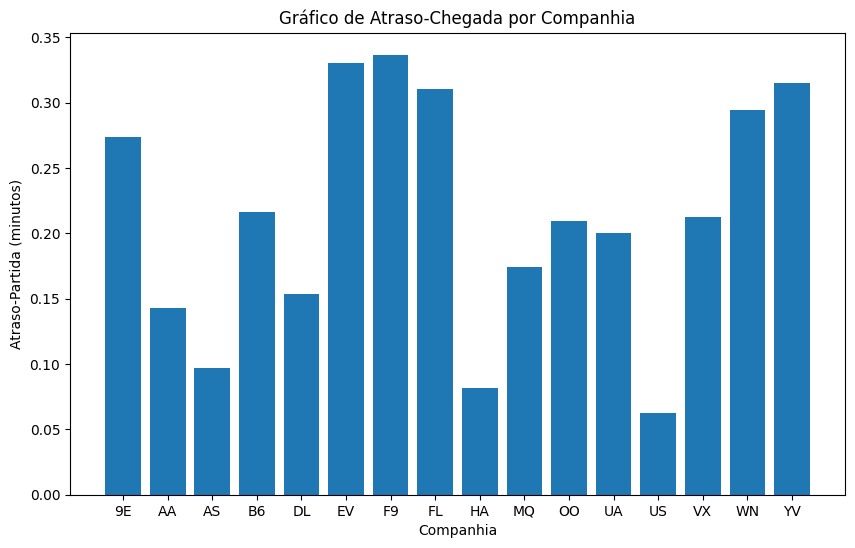

In [43]:
# Agrupando os dados por Companhia e calculando a média de Atraso-Partida
df_grouped = BaseDados.groupby('Companhia')['Atraso-Partida'].mean().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Companhia'], df_grouped['Atraso-Partida'])

# Adicionando título e rótulos
plt.title('Gráfico de Atraso-Chegada por Companhia')
plt.xlabel('Companhia')
plt.ylabel('Atraso-Partida (minutos)')

# Mostrando o gráfico
plt.show()

In [44]:
companhias_unicas = BaseDados['Companhia'].drop_duplicates()

# Imprimindo as companhias únicas
print(companhias_unicas)

1        UA
3        AA
4        B6
5        DL
8        EV
19       MQ
31       US
40       WN
64       VX
75       FL
79       AS
117      9E
146      F9
163      HA
2241     YV
25526    OO
Name: Companhia, dtype: object


In [61]:
# Calculando a média de atraso por companhia
df_grouped = BaseDados.groupby('Companhia')['Atraso-Chegada'].mean().reset_index()

# Categorizando as companhias
df_grouped['Categoria'] = pd.cut(df_grouped['Atraso-Chegada'], bins=[-0.99, 0, 0.10, 0.15, 0.99], labels=['Chegada antecipada','Baixo Atraso', 'Médio Atraso', 'Alto Atraso'])

# Imprimindo as companhias categorizadas
print(df_grouped)

   Companhia  Atraso-Chegada           Categoria
0         9E        0.122994        Médio Atraso
1         AA        0.006072        Baixo Atraso
2         AS       -0.165515  Chegada antecipada
3         B6        0.157633         Alto Atraso
4         DL        0.027406        Baixo Atraso
5         EV        0.263274         Alto Atraso
6         F9        0.365345         Alto Atraso
7         FL        0.335265         Alto Atraso
8         HA       -0.115253  Chegada antecipada
9         MQ        0.179579         Alto Atraso
10        OO        0.198851         Alto Atraso
11        UA        0.059300        Baixo Atraso
12        US        0.035493        Baixo Atraso
13        VX        0.029408        Baixo Atraso
14        WN        0.160819         Alto Atraso
15        YV        0.259283         Alto Atraso


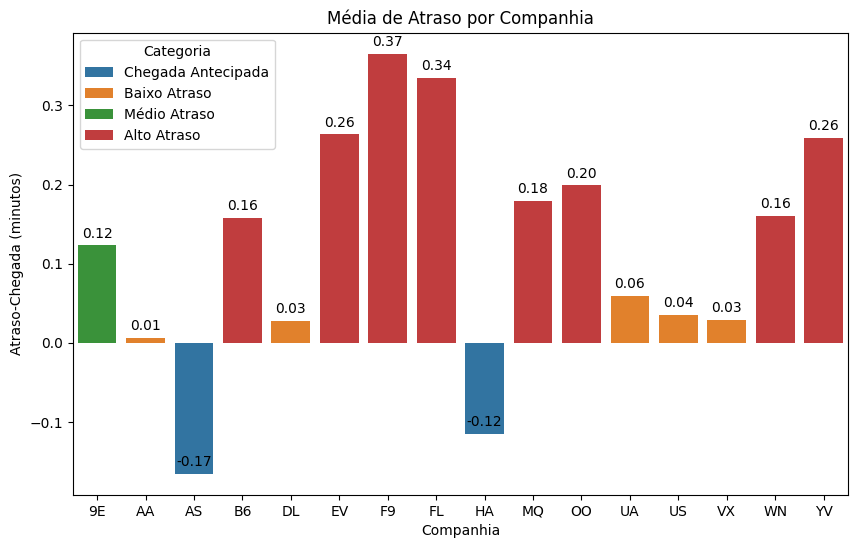

In [104]:
# Calculando a média de atraso por companhia
df_grouped = BaseDados.groupby('Companhia')['Atraso-Chegada'].mean().reset_index()

# Categorizando as companhias
df_grouped['Categoria'] = pd.cut(df_grouped['Atraso-Chegada'], bins=[-0.99, 0, 0.10, 0.15, 0.99], labels=['Chegada Antecipada', 'Baixo Atraso', 'Médio Atraso', 'Alto Atraso'])

# Criando um gráfico de barras categorizadas
plt.figure(figsize=(10, 6))
sns.barplot(x='Companhia', y='Atraso-Chegada', hue='Categoria', data=df_grouped)

# Adicionando título e labels
plt.title('Média de Atraso por Companhia')
plt.xlabel('Companhia')
plt.ylabel('Atraso-Chegada (minutos)')

# Adicionando valores em cima das barras
for i, row in df_grouped.iterrows():
    plt.text(i, row['Atraso-Chegada'] + 0.01, f"{row['Atraso-Chegada']:.2f}", ha='center')

# Mostrando o gráfico
plt.show()

In [54]:
# Calculando a média de atraso por companhia
df_grouped = BaseDados.groupby('Companhia')['Atraso-Partida'].mean().reset_index()

# Categorizando as companhias
df_grouped['Categoria'] = pd.cut(df_grouped['Atraso-Partida'], bins=[0, 0.10, 0.15, 0.99], labels=['Baixo Atraso', 'Médio Atraso', 'Alto Atraso'])

# Imprimindo as companhias categorizadas
print(df_grouped)

   Companhia  Atraso-Partida     Categoria
0         9E        0.273993   Alto Atraso
1         AA        0.142819  Médio Atraso
2         AS        0.097179  Baixo Atraso
3         B6        0.216126   Alto Atraso
4         DL        0.153732   Alto Atraso
5         EV        0.330649   Alto Atraso
6         F9        0.336686   Alto Atraso
7         FL        0.310100   Alto Atraso
8         HA        0.081676  Baixo Atraso
9         MQ        0.174090   Alto Atraso
10        OO        0.209770   Alto Atraso
11        UA        0.200282   Alto Atraso
12        US        0.062412  Baixo Atraso
13        VX        0.212611   Alto Atraso
14        WN        0.294361   Alto Atraso
15        YV        0.314982   Alto Atraso


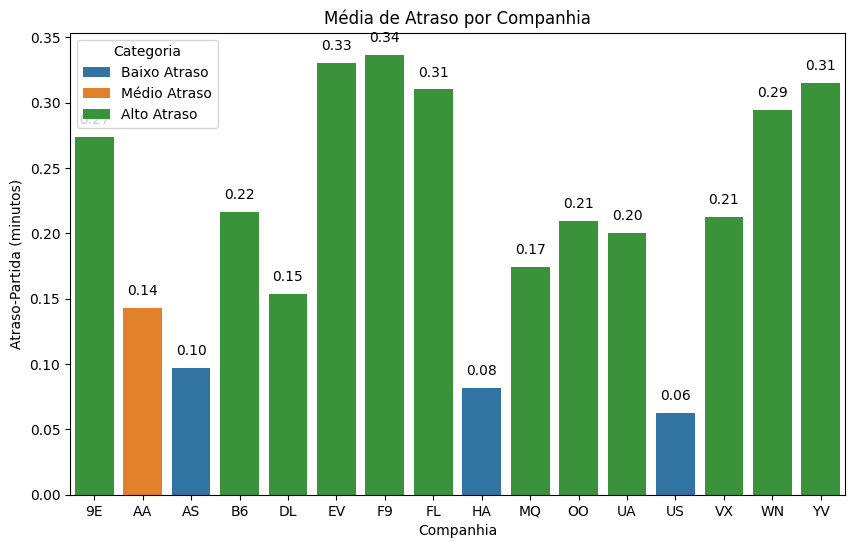

In [103]:
# Calculando a média de atraso por companhia
df_grouped = BaseDados.groupby('Companhia')['Atraso-Partida'].mean().reset_index()

# Categorizando as companhias
df_grouped['Categoria'] = pd.cut(df_grouped['Atraso-Partida'], bins=[0, 0.10, 0.15, 0.99], labels=['Baixo Atraso', 'Médio Atraso', 'Alto Atraso'])

# Criando um gráfico de barras categorizadas
plt.figure(figsize=(10, 6))
sns.barplot(x='Companhia', y='Atraso-Partida', hue='Categoria', data=df_grouped)

# Adicionando título e labels
plt.title('Média de Atraso por Companhia')
plt.xlabel('Companhia')
plt.ylabel('Atraso-Partida (minutos)')

# Adicionando valores em cima das barras
for i, row in df_grouped.iterrows():
    plt.text(i, row['Atraso-Partida'] + 0.01, f"{row['Atraso-Partida']:.2f}", ha='center')

# Mostrando o gráfico
plt.show()

In [62]:
# Calculando a média de atraso por companhia
df_grouped = BaseDados.groupby('Companhia')['Atraso-Chegada'].mean().reset_index()

# Ordenando as companhias por atraso médio em ordem decrescente
df_grouped = df_grouped.sort_values(by='Atraso-Chegada', ascending=False)

# Imprimindo as companhias ordenadas
print(df_grouped)

   Companhia  Atraso-Chegada
6         F9        0.365345
7         FL        0.335265
5         EV        0.263274
15        YV        0.259283
10        OO        0.198851
9         MQ        0.179579
14        WN        0.160819
3         B6        0.157633
0         9E        0.122994
11        UA        0.059300
12        US        0.035493
13        VX        0.029408
4         DL        0.027406
1         AA        0.006072
8         HA       -0.115253
2         AS       -0.165515


In [63]:
# Calculando a média de atraso por companhia
df_grouped = BaseDados.groupby('Companhia')['Atraso-Partida'].mean().reset_index()

# Ordenando as companhias por atraso médio em ordem decrescente
df_grouped = df_grouped.sort_values(by='Atraso-Partida', ascending=False)

# Imprimindo as companhias ordenadas
print(df_grouped)

   Companhia  Atraso-Partida
6         F9        0.336686
5         EV        0.330649
15        YV        0.314982
7         FL        0.310100
14        WN        0.294361
0         9E        0.273993
3         B6        0.216126
13        VX        0.212611
10        OO        0.209770
11        UA        0.200282
9         MQ        0.174090
4         DL        0.153732
1         AA        0.142819
2         AS        0.097179
8         HA        0.081676
12        US        0.062412



2.A rota ou aeronave podem influenciar nos atrasos?

In [113]:
df_describe_f9 = BaseDados[BaseDados['Companhia'] == 'F9'].groupby(['Companhia', 'Origem', 'Destino', 'Distancia']).describe()

print(df_describe_f9)

                                      Ano                               \
                                    count    mean  std     min     25%   
Companhia Origem Destino Distancia                                       
F9        LGA    DEN     1620       681.0  2013.0  0.0  2013.0  2013.0   

                                                              Mês            \
                                       50%     75%     max  count      mean   
Companhia Origem Destino Distancia                                            
F9        LGA    DEN     1620       2013.0  2013.0  2013.0  681.0  6.587372   

                                    ... Horas       Minutos             \
                                    ...   75%   max   count       mean   
Companhia Origem Destino Distancia  ...                                  
F9        LGA    DEN     1620       ...  17.0  22.0   681.0  29.584435   

                                                                            
            

In [118]:
# Selecionando a companhia 'F9'
df_f9 = BaseDados[BaseDados['Companhia'] == 'F9']

# Agrupando por 'Companhia', 'Origem', 'Destino' e 'Distancia'
df_grouped = df_f9.groupby(['Companhia', 'Origem', 'Destino', 'Distancia'])

# Criando uma tabela com as estatísticas descritivas
df_describe = df_grouped.describe()

# Renomeando as colunas
df_describe = df_describe.rename(columns={
    'count': 'Count',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    '25%': '25%',
    '50%': 'Mediana',
    '75%': '75%',
    'max': 'Máximo'
})
# Imprimindo a tabela
print(df_describe)

                                      Ano                                \
                                    Count   Média Desvio Padrão  Mínimo   
Companhia Origem Destino Distancia                                        
F9        LGA    DEN     1620       681.0  2013.0           0.0  2013.0   

                                                                      Mês  \
                                       25% Mediana     75%  Máximo  Count   
Companhia Origem Destino Distancia                                          
F9        LGA    DEN     1620       2013.0  2013.0  2013.0  2013.0  681.0   

                                              ... Horas        Minutos  \
                                       Média  ...   75% Máximo   Count   
Companhia Origem Destino Distancia            ...                        
F9        LGA    DEN     1620       6.587372  ...  17.0   22.0   681.0   

                                                                          \
                 

In [85]:
df_describe_fl = BaseDados[BaseDados['Companhia'] == 'FL'].groupby(['Companhia', 'Origem', 'Destino', 'Distancia']).describe()

print(df_describe_fl)

                                       Ano                               \
                                     count    mean  std     min     25%   
Companhia Origem Destino Distancia                                        
FL        LGA    ATL     762        2278.0  2013.0  0.0  2013.0  2013.0   
                 CAK     397         842.0  2013.0  0.0  2013.0  2013.0   
                 MKE     738          55.0  2013.0  0.0  2013.0  2013.0   

                                                               Mês            \
                                       50%     75%     max   count      mean   
Companhia Origem Destino Distancia                                             
FL        LGA    ATL     762        2013.0  2013.0  2013.0  2278.0  6.007024   
                 CAK     397        2013.0  2013.0  2013.0   842.0  6.416865   
                 MKE     738        2013.0  2013.0  2013.0    55.0  1.618182   

                                    ... Horas       Minutos         

3.Existe algum padrão ou tendência nos atrasos? Se sim, o que pode ser feito para reduzi-los?

In [89]:
BaseModificada = BaseDados.select_dtypes(include=['int64', 'float64'])

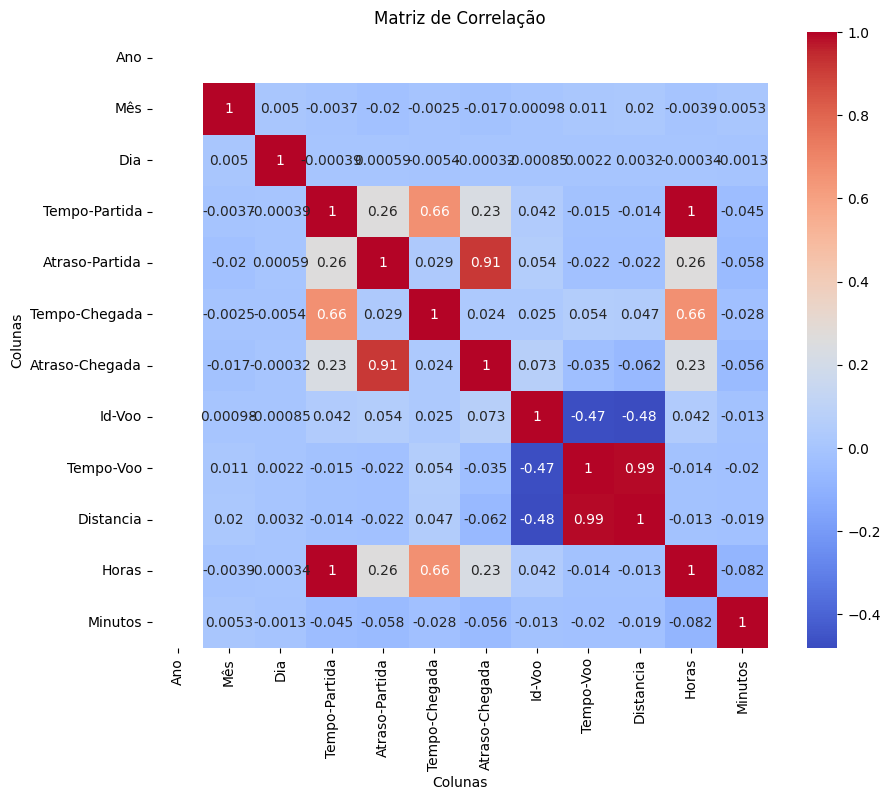

In [92]:
# Calcula a correlação entre as colunas
corr_matrix = BaseModificada.corr()

# Cria um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Adiciona título e labels
plt.title('Matriz de Correlação')
plt.xlabel('Colunas')
plt.ylabel('Colunas')

# Mostra o gráfico
plt.show()

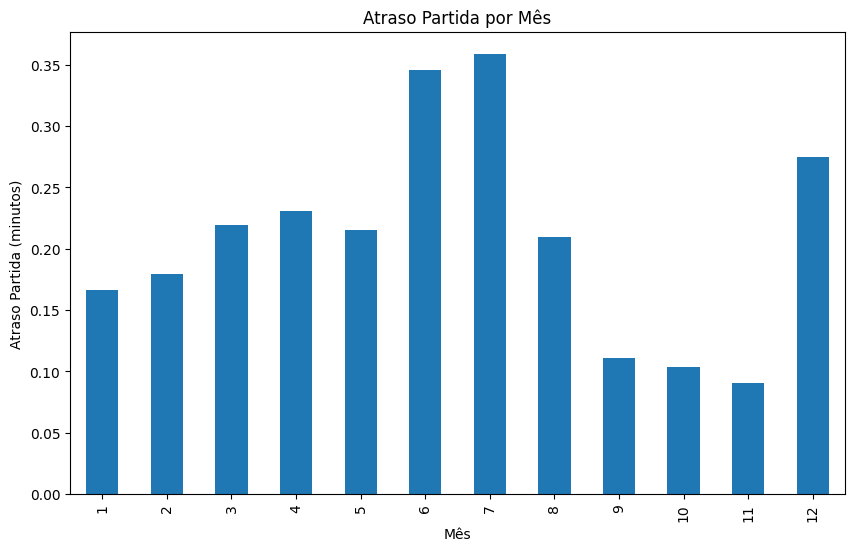

In [93]:
atraso_por_mes = BaseModificada.groupby('Mês')['Atraso-Partida'].mean()

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))
atraso_por_mes.plot(kind='bar')

# Adiciona título e labels
plt.title('Atraso Partida por Mês')
plt.xlabel('Mês')
plt.ylabel('Atraso Partida (minutos)')

# Mostra o gráfico
plt.show()

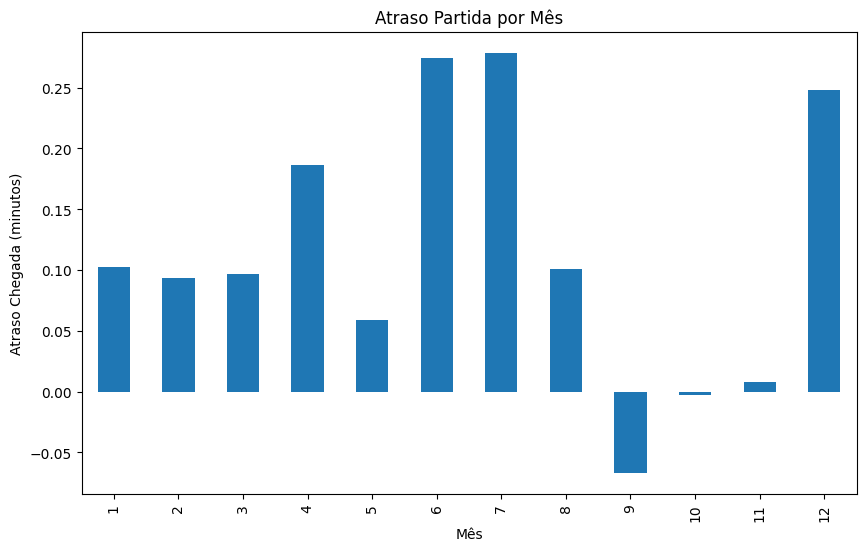

In [119]:
atraso_por_mes = BaseModificada.groupby('Mês')['Atraso-Chegada'].mean()

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))
atraso_por_mes.plot(kind='bar')

# Adiciona título e labels
plt.title('Atraso Partida por Mês')
plt.xlabel('Mês')
plt.ylabel('Atraso Chegada (minutos)')

# Mostra o gráfico
plt.show()


### TODAS AS CONCLUSÕES DEVEM SER APRESENTADAS:

1.Com um texto explicativo

2.Com visualizações que comprovem e sustem as suas conclusões

3.Ao menos um gráfico analítico e um gráfico executivo.


### FORMATO DE ENTREGA:

1.Notebook com as análises e as visualizações

2.Documento powerpoint com as conclusões das análises e as visualizações e o nome dos integrantes do grupo e os respectivos githubs com os notebooks.